## Stat 133 Lab 4
Xinyang Geng

SID: 14416876

PS: We use [Jupyter](http://jupyter.org/) instead of R markdown. Jupyter is web-based, interactive and flexible. You should consider using it too.

In [1]:
library(DataComputing)
library(repr)

# Resize the plot to be 10 x 5
options(repr.plot.width=10, repr.plot.height=5)

Loading required package: ggplot2
Loading required package: dplyr

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: lubridate
Loading required package: tidyr
Loading required package: stringr
Loading required package: knitr
Loading required package: mosaic
Loading required package: lattice
Loading required package: car
Loading required package: mosaicData

Attaching package: 'mosaic'

The following object is masked from 'package:car':

    logit

The following object is masked from 'package:lubridate':

    interval

The following objects are masked from 'package:dplyr':

    count, do, tally

The following objects are masked from 'package:stats':

    D, IQR, binom.test, cor, cov, fivenum, median, prop.test, quantile,
    sd, t.test, var

The following objects are masked from 'package:base':

    max, mean, min, p

We write a function for our query

In [2]:
# This function returns the plot object
query_names = function(baby_names, ...) {
    query = c(...)
    processed_names = BabyNames %>%
        select(name, count, year) %>%
        group_by(year) %>%
        mutate(frequency = count / sum(count)) %>%
        filter(name %in% query) %>%
        group_by(name, year) %>%
        summarize(frequency=sum(frequency))
    plt = ggplot(processed_names) + xlab("Year") + ylab("Popularity")
    for (name in query) {
        plt = plt + geom_path(aes(x=year, y=frequency, col=name), alpha=0.5, size=1)
    }
    plt
}

Let's query "Abraham", "Franklin", "Woodrow".

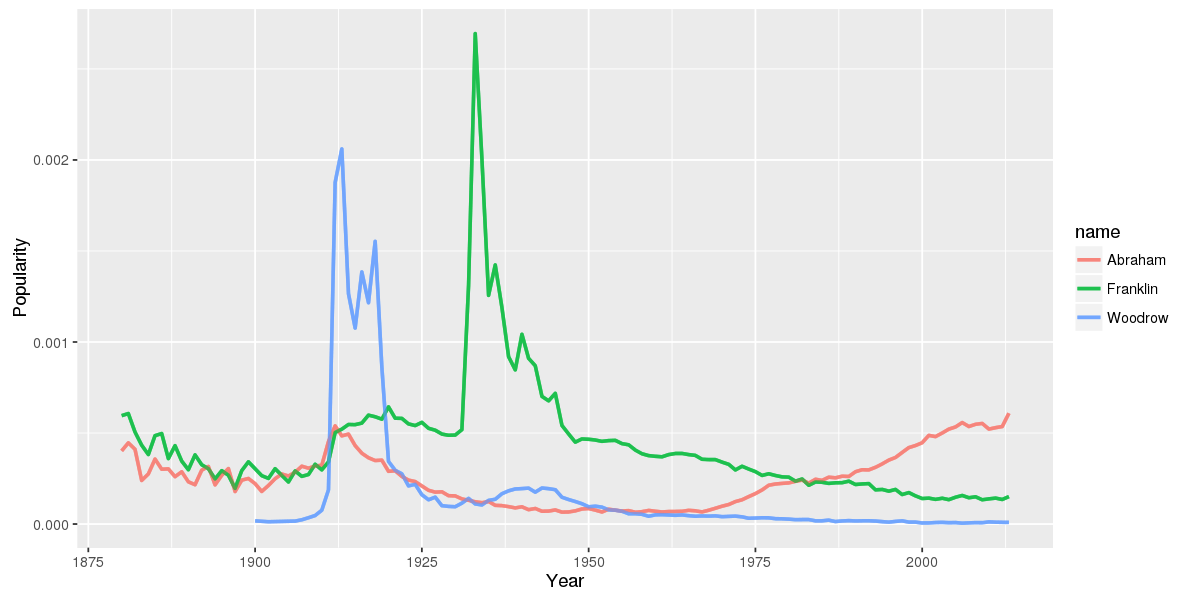

In [5]:
query_names(baby_names=BabyNames, "Abraham", "Franklin", "Woodrow")

We can also query "Alice", "Bob", "Eve".

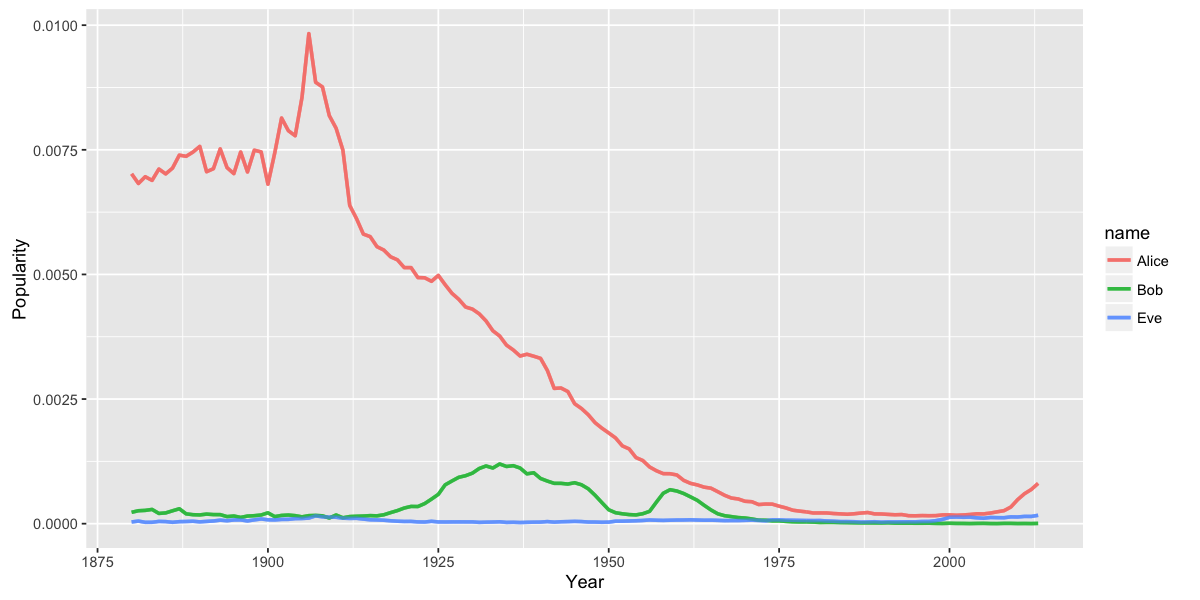

In [96]:
query_names(baby_names=BabyNames, "Alice", "Bob", "Eve")